**Merging 2 GeoJSONs into One GeoDataFrame**

In [4]:
#reading of geojsons files
from geopandas import GeoDataFrame
import geopandas as gpd
url1 = "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/california.geojson"
url2 = "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/texas.geojson"

gdf1 = gpd.read_file(url1)
gdf2 = gpd.read_file(url2)


In [7]:
print(gdf1)

         name  ...                                           geometry
0  California  ...  MULTIPOLYGON (((-120.24848 33.99933, -120.2473...

[1 rows x 12 columns]


In [8]:
gdf2

,name,abbreviation,capital,city,population,area,waterarea,landarea,houseseats,statehood,group,geometry
0,Texas,TX,Austin,Houston,26448193,695660,19075,676588,36,1845-12-29,US States,"MULTIPOLYGON (((-96.83003 28.11184, -96.82705 ..."


In [9]:
print(gdf1.shape)
print(gdf2.shape)

(1, 12)
(1, 12)


In [10]:
file_urls = [
    "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/california.geojson",
    "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/texas.geojson"
]

In [11]:
geo_list=[]

for url in file_urls:
    gdf=gpd.read_file(url)
    geo_list.append(gdf)


In [13]:
import pandas as pd
combined_gdf=gpd.GeoDataFrame(pd.concat(geo_list,ignore_index=True))


In [14]:
print(type(combined_gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [18]:
print(combined_gdf)
print(combined_gdf.shape)

         name  ...                                           geometry
0  California  ...  MULTIPOLYGON (((-120.24848 33.99933, -120.2473...
1       Texas  ...  MULTIPOLYGON (((-96.83003 28.11184, -96.82705 ...

[2 rows x 12 columns]
(2, 12)


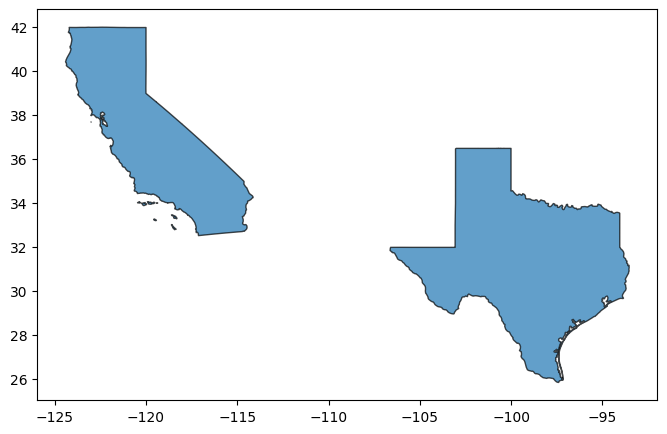

In [19]:
import matplotlib.pyplot as plot
combined_gdf.plot(edgecolor='black', figsize=(8,6),alpha=0.7)
plot.show()

In [20]:
combined_gdf.to_file("Merged_states.geojson", driver="GeoJSON")


In [37]:
result = gpd.sjoin(gdf1,gdf2,how="left", predicate='contains')
print(result)


    name_left abbreviation_left  ... statehood_right group_right
0  California                CA  ...             NaT         NaN

[1 rows x 24 columns]
